In [1]:
"""
For .cif files for Minerals
"""

import numpy as np
import pickle


# INPUT
FILE_PATH = "example/Rockbridgeite.cif"
FILE_NAME = "Rockbridgeite"
OUTPUT_FILE = "example/Rockbridgeite.usf"

In [2]:
# required parameters


plain_sym_ops = [
    "x, y, z",
    "x+1, y, z",
    "x, y+1, z",
    "x, y, z+1",
    "x+1, y+1, z",
    "x+1, y, z+1",
    "x, y+1, z+1",
    "x+1, y+1, z+1"
]



full_atom_name_list = [
    "H", "Li", "Na", "K", "Rb", "Cs", "Fr", 
    "Be", "Mg", "Ca", "Sr", "Ba", "Ra", 
    "B", "Al", "Ga", "In", "Tl", "Nh",
    "C", "Si", "Ge", "Sn", "Pb", "Fl",
    "N", "P", "As", "Sb", "Bi", "Mc",
    "O", "S", "Se", "Te", "Po", "Lv",
    "F", "Cl", "Br", "I", "At", "Ts",
    "He", "Ne", "Ar", "Kr", "Xe", "Rn", "Og",
    "Sc", "Y",  # transition metal
    "Ti", "Zr", "Hf", "Rf",
    "V", "Nb", "Ta", "Db",
    "Cr", "Mo", "W", "Sg", 
    "Mn", "Tc", "Re", "Bh",
    "Fe", "Ru", "Os", "Hs",
    "Co", "Rh", "Ir", "Mt", 
    "Ni", "Pd", "Pt", "Ds", 
    "Cu", "Ag", "Au", "Rg",
    "Zn", "Cd", "Hg", "Cn",
    "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu",
    "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr",
]   # divided by group (in periodic table)



def read_cif(cif_file_name):
    """
    Read a CIF file and return a dictionary with the data.

    Parameters
    ----------
    cif_file_name : str
        The name of the CIF file to read.
    
    Returns
    -------
    cif_data : dict
        A dictionary with the data from the CIF file.
    """

    info_dict = {}

    cif_content = open(cif_file_name, 'r').readlines()

    assert cif_content[0] == "data_global\n", "CIF file must start with data_global"

    # before we start loop
    block_num = -1
    cache_key = None

    for i in range(1, len(cif_content)):
        if cif_content[i] == "loop_\n":
            block_num += 1
            cache_key = None   # reset cache_key
        elif cif_content[i].startswith("_"):   # this should be key
            cache_key = None   # reset cache_key
            if cif_content[i].startswith("_database_code_amcsd"):
                info_dict["database_code_amcsd"] = cif_content[i].split("_database_code_amcsd")[1].strip()
            elif cif_content[i].startswith("_chemical_formula_sum"):
                info_dict["chemical_formula_sum"] = cif_content[i].split("_chemical_formula_sum")[1].strip().strip("'")
            elif cif_content[i].startswith("_cell_length_a"):
                info_dict["cell_length_a"] = np.float32(cif_content[i].split("_cell_length_a")[1].strip())
            elif cif_content[i].startswith("_cell_length_b"):
                info_dict["cell_length_b"] = np.float32(cif_content[i].split("_cell_length_b")[1].strip())
            elif cif_content[i].startswith("_cell_length_c"):
                info_dict["cell_length_c"] = np.float32(cif_content[i].split("_cell_length_c")[1].strip())
            elif cif_content[i].startswith("_cell_angle_alpha"):
                info_dict["cell_angle_alpha"] = np.float32(cif_content[i].split("_cell_angle_alpha")[1].strip())
            elif cif_content[i].startswith("_cell_angle_beta"):
                info_dict["cell_angle_beta"] = np.float32(cif_content[i].split("_cell_angle_beta")[1].strip())
            elif cif_content[i].startswith("_cell_angle_gamma"):
                info_dict["cell_angle_gamma"] = np.float32(cif_content[i].split("_cell_angle_gamma")[1].strip())
            elif cif_content[i].startswith("_cell_volume"):
                info_dict["cell_volume"] = np.float32(cif_content[i].split("_cell_volume")[1].strip())
            elif cif_content[i].startswith("_symmetry_space_group_name_H-M"):
                info_dict["symmetry_space_group_name_H-M"] = cif_content[i].split("_symmetry_space_group_name_H-M")[1].strip().strip("'")
            elif cif_content[i].startswith("_space_group_symop_operation_xyz"):
                cache_key = "space_group_symop_operation_xyz"
                info_dict["space_group_symop_operation_xyz"] = []
            elif cif_content[i].startswith("_atom_site_fract_z"):
                if cif_content[i-1].startswith("_atom_site_fract_y"):
                    if cif_content[i-2].startswith("_atom_site_fract_x"):
                        if cif_content[i-3].startswith("_atom_site_label"):
                            cache_key = "atom_site_fract"
                            info_dict["atom_site_fract"] = []
            elif cif_content[i].startswith("_atom_site_U_iso_or_equiv"):
                if cif_content[i-1].startswith("_atom_site_occupancy"):
                    if cif_content[i-2].startswith("_atom_site_fract_z"):
                        if cif_content[i-3].startswith("_atom_site_fract_y"):
                            if cif_content[i-4].startswith("_atom_site_fract_x"):
                                if cif_content[i-5].startswith("_atom_site_label"):
                                    cache_key = "atom_site_fract"
                                    info_dict["atom_site_fract"] = []
            else:
                pass
            

        else:  # this should be value
            if cache_key:
                if cache_key == "space_group_symop_operation_xyz":
                    info_dict["space_group_symop_operation_xyz"].append(cif_content[i].strip().strip("'"))
                elif cache_key == "atom_site_fract":
                    if len(cif_content[i].split()) == 4:
                        info_dict["atom_site_fract"].append([cif_content[i].split()[0]]+[np.float32(cif_content[i].split()[j]) for j in range(1,4)])
                    elif len(cif_content[i].split()) == 6:
                        info_dict["atom_site_fract"].append([cif_content[i].split()[0]]+[np.float32(cif_content[i].split()[j]) for j in range(1,4)])
                    else:
                        pass
                else:
                    pass

    return info_dict



def symmetry_operations(sym_ops, start_atom_fract, 
                        x_threshold=(-np.inf,np.inf), y_threshold=(-np.inf,np.inf), z_threshold=(-np.inf,np.inf)):
    """
    Apply symmetry operations to a point in space.

    Parameters
    ----------
    sym_ops : list
        A list of symmetry operations in the form of strings.
    start_atom_fract : list
        A list of the starting coordinates.
    x_threshold : tuple, optional
        A tuple containing the minimum and maximum values of x to include in the output.
    y_threshold : tuple, optional
        A tuple containing the minimum and maximum values of y to include in the output.
    z_threshold : tuple, optional
        A tuple containing the minimum and maximum values of z to include in the output.
    
    Returns
    -------
    sym_fract_list : list
        A list of the symmetrically equivalent positions.
    """

    # Initialize the list of symmetric positions
    sym_fract_list = []

    # starting position
    x = start_atom_fract[0]
    y = start_atom_fract[1]
    z = start_atom_fract[2]

    # Apply symmetry operations
    for op in sym_ops:
        # Apply the symmetry operation to the coordinates
        new_pos = eval(op)
        # Check if the new position is within the threshold
        if (x_threshold[0] <= new_pos[0] <= x_threshold[1]) and \
           (y_threshold[0] <= new_pos[1] <= y_threshold[1]) and \
           (z_threshold[0] <= new_pos[2] <= z_threshold[1]):
            if new_pos not in sym_fract_list:
                sym_fract_list.append(new_pos)
    
    return sym_fract_list


def unit_cell(a, b, c, alpha, beta, gamma):
    # Convert angles from degrees to radians for computation
    alpha_rad = np.radians(alpha)
    beta_rad = np.radians(beta)
    gamma_rad = np.radians(gamma)

    # Calculate the vectors that define the unit cell in 3D space
    v_a = np.array([a, 0, 0])
    v_b = np.array([b * np.cos(gamma_rad), b * np.sin(gamma_rad), 0])
    v_c_x = c * np.cos(beta_rad)
    v_c_y = c * (np.cos(alpha_rad) - np.cos(beta_rad) * np.cos(gamma_rad)) / np.sin(gamma_rad)
    v_c_z = np.sqrt(c**2 - v_c_x**2 - v_c_y**2)
    v_c = np.array([v_c_x, v_c_y, v_c_z])

    # Define vertices based on the vectors
    O = np.array([0, 0, 0])
    A = O + v_a
    B = O + v_b
    C = O + v_c
    D = O + v_a + v_b
    E = O + v_a + v_c
    F = O + v_b + v_c
    G = O + v_a + v_b + v_c
    
    vertices = [O, A, B, C, D, E, F, G]

    # Define the sides (polygons) of the unit cell
    sides = [
        [O, A, D, B],  # bottom
        [O, A, E, C],  # front
        [O, B, F, C],  # left
        [A, D, G, E],  # back
        [B, D, G, F],  # right
        [C, E, G, F],  # top
    ]

    return vertices, sides



def get_coords_from_cif(
        cif_file_name, 
        x_threshold=(-1,+1), 
        y_threshold=(-1,+1), 
        z_threshold=(-1,+1),
    ):
    """
    Read a CIF file and return coordinates within threshold.
    """
    # Read the CIF file information
    cif_info = read_cif(cif_file_name)


    # Get the symmetry coordinates
    sym_ops = cif_info["space_group_symop_operation_xyz"]

    atom_type_list = []
    atom_fract_list = []

    for atom in cif_info["atom_site_fract"]:
        atom_type = atom[0]
        atom_fract = atom[1:]

        sym_fract_list = symmetry_operations(sym_ops, atom_fract, x_threshold, y_threshold, z_threshold)

        # apply plain sym ops
        sym_fract_list_full = []
        for sym_fract in sym_fract_list:
            sym_fract_list_full += symmetry_operations(plain_sym_ops, sym_fract, (0,1), (0,1), (0,1))

                

        for sym_pos in sym_fract_list_full:
            atom_type_list.append(atom_type)
            atom_fract_list.append(sym_pos)


    # unit cell parameters in angstroms and degrees
    a = cif_info["cell_length_a"]
    b = cif_info["cell_length_b"]
    c = cif_info["cell_length_c"]
    alpha = cif_info["cell_angle_alpha"]
    beta = cif_info["cell_angle_beta"]
    gamma = cif_info["cell_angle_gamma"]


    # Get coordinates of the unit cell and atoms
    vertices, _ = unit_cell(a, b, c, alpha, beta, gamma)
    atom_coord_list = [atom_fract*vertices[-1] for atom_fract in atom_fract_list]

    return atom_type_list, atom_coord_list


In [3]:
atom_name, atom_coordinate = get_coords_from_cif(FILE_PATH)

# clean atom_name to atom_type
atom_type = []
for atom_name_item in atom_name:
    if len(atom_name_item) == 1:
        if atom_name_item in full_atom_name_list:
            atom_type.append(atom_name_item)
        else:
            raise ValueError("Atom name not found")
    elif len(atom_name_item) >= 2:
        if atom_name_item[0:2] in full_atom_name_list:
            atom_type.append(atom_name_item[0:2])
        elif atom_name_item[0:1] in full_atom_name_list:
            atom_type.append(atom_name_item[0:1])
        else:
            raise ValueError("Atom name not found")

    


# create dictionary
usf_dict = {
    "name": FILE_NAME,
    "atom_type": np.array(atom_type, dtype=str),
    "coordinate": np.array(atom_coordinate, dtype=float)*0.1,  # note: unit is nm
    "atom_index": np.arange(len(atom_name)),
    "bond": None,
    "atom_name": np.array(atom_name, dtype=str),
}

# save dictionary
pickle.dump(usf_dict, open(OUTPUT_FILE, "wb"))


In [4]:
info_dict = read_cif(FILE_PATH)


info_dict["atom_site_fract"]

[['Fe1', 0.0, 0.0, 0.0],
 ['Fe2', 0.0687, 0.1574, 0.0],
 ['Fe3', 0.3214, 0.1385, 0.2385],
 ['P1', 0.142, 0.0432, 0.5],
 ['P2', 0.4806, 0.25, 0.0],
 ['O1', 0.0477, 0.25, 0.2508],
 ['O2', 0.0829, 0.0605, 0.2615],
 ['O-H3', 0.3132, 0.25, 0.3876],
 ['O4', 0.3126, 0.0357, 0.0],
 ['O-H5', 0.2175, 0.172, 0.0],
 ['O-H6', 0.4204, 0.1071, 0.5],
 ['O7', 0.4171, 0.1763, 0.0],
 ['O8', 0.2276, 0.1044, 0.5]]

In [5]:
plain_sym_ops

['x, y, z',
 'x+1, y, z',
 'x, y+1, z',
 'x, y, z+1',
 'x+1, y+1, z',
 'x+1, y, z+1',
 'x, y+1, z+1',
 'x+1, y+1, z+1']

In [6]:
coords = symmetry_operations(info_dict["space_group_symop_operation_xyz"], [0.0,0.0,0.0], 
                             x_threshold=(-1,1), y_threshold=(-1,1), z_threshold=(-1,1))

coords_update = []
for point in coords:
    coords_update += symmetry_operations(plain_sym_ops, point, 
                                         x_threshold=(0,1), y_threshold=(0,1), z_threshold=(0,1))

coords_update = np.array(coords_update)
print(coords_update)

[[ 0.   0.   0. ]
 [ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   0.   1. ]
 [ 1.   1.   0. ]
 [ 1.   0.   1. ]
 [ 0.   1.   1. ]
 [ 1.   1.   1. ]
 [ 0.5  0.   0.5]
 [ 0.5  1.   0.5]
 [-0.   0.5  0. ]
 [ 1.   0.5  0. ]
 [-0.   0.5  1. ]
 [ 1.   0.5  1. ]
 [ 0.5  0.5  0.5]]


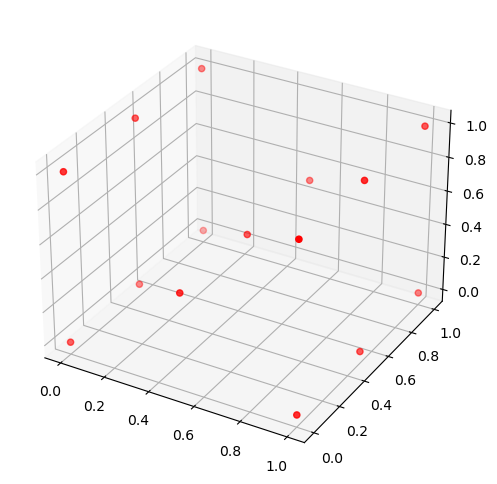

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='3d')
ax.scatter(coords_update[:,0], coords_update[:,1], coords_update[:,2], c='r', marker='o')

